## 4. Text Cleaning and Manipulation-Tweets


## load necessay library and cimate change tweet data

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

#to plot within notebook
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


# set maximun column size
pd.options.display.max_colwidth = 300

In [2]:
df=pd.read_csv('climate_change03.csv', sep='|')
df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,WY,ID,NV,OR,HI,AK,UK,Location,first_name,gender
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Crazy,unknown
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Daniella,female
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Cricket,unknown
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,John,male
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,BAPS,unknown


## Extract device data from source

## define a function to process tweet (remove sepcial characters, remove https, remove single characer, and change to lower case)

In [12]:
# take a tweet as an example



In [1]:
# remove all special characters from text




## Remove https

In [2]:
# remove https for one tweet



In [4]:
# combine all steps into one line of code



In [5]:
# apply this function to the whole dataframe



## Remove special characters, single character and convert it to lower case

In [6]:
# created a function to process tweets

def process_text(text):
    #text1=re.sub(r"\W", " ", text)
    
    text1=re.sub(r"[^a-zA-Z0-9#@]", " ", text)  # change the code to keep # and @
    
    text2=re.sub(r"\s+[a-zA-Z0-9]\s+", " ", text1)

    text3=text2.lower()

    return text3

In [8]:
# apply the function to the whole tweets



## Remove stop words

In [158]:
#! pip install nltk

In [9]:
import nltk
from nltk.corpus import stopwords

stopwords=stopwords.words('english')
stopwords[0:5]

['i', 'me', 'my', 'myself', 'we']

In [10]:
additional_stopwords=['rt', 'climate', 'change']

stopwords=stopwords+additional_stopwords

In [11]:
def remove_stopwords(text):
    word_list=text.split()
    word_list_removeStopwords=[]
    for word in word_list:
        if word in stopwords or len(word)==1:
            continue
        else:
            word_list_removeStopwords.append(word)
       
    text_cleaned=" ".join(word_list_removeStopwords)
    
    return text_cleaned

In [31]:
df['text3']=df['text2'].apply(remove_stopwords)

df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,HI,AK,UK,Location,first_name,gender,device,text1,text2,text3
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,...,0,0,0,Z_Unknown,Crazy,unknown,Twitter for Android,@jemmaspatronus It was a stolen joke. As usual.,@jemmaspatronus it was stolen joke as usual,@jemmaspatronus stolen joke usual
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,...,0,0,0,Z_Unknown,Daniella,female,Twitter for iPhone,@jwmkup @SuarezMiami Much of what is going on in society should be concerning to us all. There’s widespread injusti…,@jwmkup @suarezmiami much of what is going on in society should be concerning to us all there widespread injusti,@jwmkup @suarezmiami much going society concerning us widespread injusti
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,...,0,0,0,Z_Unknown,Cricket,unknown,Twitter for iPhone,RT @NewsNancy9: @J_a_l_i_USA Man-made climate change is a cover for the biggest heist in world history. People better wake up before they’…,rt @newsnancy9 @j l usa man made climate change is cover for the biggest heist in world history people better wake up before they,@newsnancy9 @j usa man made cover biggest heist world history people better wake
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,...,0,0,0,Z_Unknown,John,male,Twitter for iPhone,"RT @tearfundaus: ""Any serious discipleship in these days needs to take climate change seriously."" - Rev Tim Costello AO. Download Tearfund…",rt @tearfundaus any serious discipleship in these days needs to take climate change seriously rev tim costello ao download tearfund,@tearfundaus serious discipleship days needs take seriously rev tim costello ao download tearfund
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,...,0,0,0,Z_Unknown,BAPS,unknown,Twitter for iPhone,RT @bapslosangeles: #BAPSLosAngeles and other @BAPS mandirs joined iconic landmarks by turning off our non-essential lights at 8:30 this…,rt @bapslosangeles #bapslosangeles and other @baps mandirs joined iconic landmarks by turning off our non essential lights at 30 this,@bapslosangeles #bapslosangeles @baps mandirs joined iconic landmarks turning non essential lights 30


In [32]:
df.to_csv('climate_change04_cleaned.csv', sep='|', index=False)

## Identify top words

In [33]:
topwords=df['text3'].str.split().explode().value_counts().head(10).reset_index()

topwords.columns=['Word', 'Frequency']

topwords.head()

,Word,Frequency
0,sing,6114
1,dey,5864
2,pm,5270
3,amp,4970
4,make,4508


<AxesSubplot:xlabel='Frequency', ylabel='Word'>

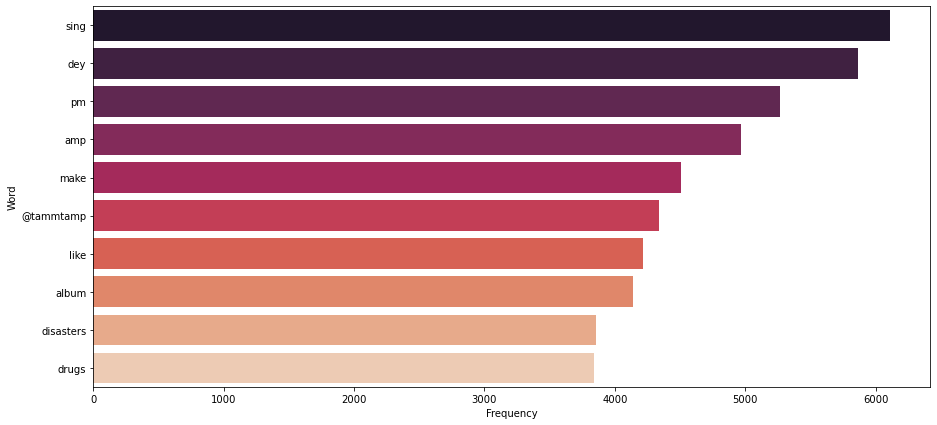

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the figure size
plt.figure(figsize=(15, 7))

# use a sequential color with 10 variations
palette=sns.color_palette("rocket", 10)


sns.barplot(data=topwords, y="Word", x="Frequency", palette=palette)

In [35]:
# use word cloud to show top 100 words

top100_words=df['text3'].str.split().explode().value_counts().head(100)
top100_words

sing     6114
dey      5864
pm       5270
amp      4970
make     4508
         ... 
fight     926
un        926
said      925
urban     922
media     915
Name: text3, Length: 100, dtype: int64

In [ ]:
# install wordcloud. You only need to install once

#!pip install wordcloud

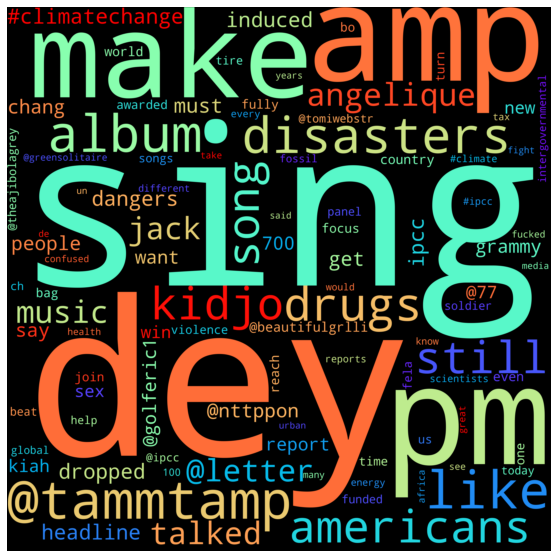

In [186]:
# create a word cloud from word frequency

from wordcloud import WordCloud
from PIL import Image

# create the WordCloud object

wordcloud = WordCloud(width=3500,height=3500,normalize_plurals=True, background_color='black',colormap='rainbow')

# generate the word cloud from word frequencies
wordcloud.generate_from_frequencies(top100_words)

#plot
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [205]:
# check tweets containing sing

# wrong code
df[df['text3'].str.contains('sing')==True]['text3']

1461             @ekww11 #imsowoke used swat bee came near try pet sing lullaby #climatechangeisreal #wtpb
1720             @ekww11 #imsowoke used swat bee came near try pet sing lullaby #climatechangeisreal #wtpb
16322                                                         african acts sing struggles pain win grammys
16519                                                                         americans win sing disasters
16675                                                                                    lady sing rapture
                                                       ...                                                
77903                                      @theajibolagrey fela sing tire soldier even beat join still win
78037                @tomiwebstr americans make music drugs violence amp still get awarded must sing songs
78046                                      @theajibolagrey fela sing tire soldier even beat join still win
78063                                

In [206]:
# check tweets containing sing

# correct code

df[df['text3'].str.contains(' sing ')==True]['text3']

1461             @ekww11 #imsowoke used swat bee came near try pet sing lullaby #climatechangeisreal #wtpb
1720             @ekww11 #imsowoke used swat bee came near try pet sing lullaby #climatechangeisreal #wtpb
16322                                                         african acts sing struggles pain win grammys
16519                                                                         americans win sing disasters
16675                                                                                    lady sing rapture
                                                       ...                                                
77903                                      @theajibolagrey fela sing tire soldier even beat join still win
78037                @tomiwebstr americans make music drugs violence amp still get awarded must sing songs
78046                                      @theajibolagrey fela sing tire soldier even beat join still win
78063                                

## Idenitfy top hashtags

In [44]:
# created a word list

df_words=df['text3'].str.split().explode().str.strip().reset_index(name="word")
df_words

,index,word
0,0,@jemmaspatronus
1,0,stolen
2,0,joke
3,0,usual
4,1,@jwmkup
...,...,...
708545,78248,use
708546,78248,voice
708547,78248,everything
708548,78249,@theanness


## Find top 10 hashtags

In [37]:
df_hashtags=df_words[(df_words['word'].str.startswith("#")==True) & (df_words['word']!="#")]['word'].value_counts().head(10).reset_index()

In [38]:
df_hashtags.columns=['Hashtag', "Frequency"]

<AxesSubplot:xlabel='Frequency', ylabel='Hashtag'>

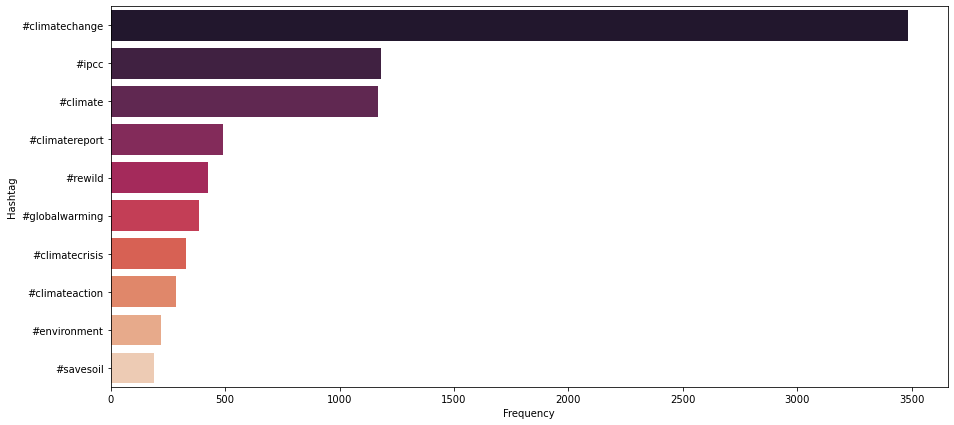

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the figure size
plt.figure(figsize=(15, 7))

# use a sequential color with 10 variations
palette=sns.color_palette("rocket", 10)


sns.barplot(data=df_hashtags, y="Hashtag", x="Frequency", palette=palette)

In [40]:
# Use a word cloud to show top 100 hastags

top100_hashtags=df_words[(df_words['word'].str.startswith("#")==True) & (df_words['word']!="#")]['word'].value_counts().head(100)
top100_hashtags

#climatechange        3482
#ipcc                 1182
#climate              1166
#climatereport         490
#rewild                427
                      ... 
#alboforpm              24
#scottydoesnothing      24
#budget22               24
#plastiks               24
#lismorefloods          23
Name: word, Length: 100, dtype: int64

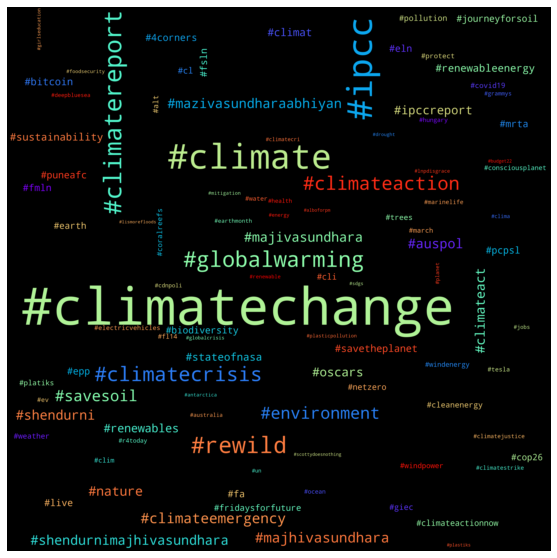

In [41]:
# create a word cloud from word frequency

from wordcloud import WordCloud
from PIL import Image

# create the WordCloud object

wordcloud = WordCloud(width=3500,height=3500,normalize_plurals=True, background_color='black',colormap='rainbow')

# generate the word cloud from word frequencies
wordcloud.generate_from_frequencies(top100_hashtags)

#plot
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
#refine word cloud by removing #climtechange and #climate

top100_hashtags=df_words[(df_words['word'].str.startswith("#")==True) & (df_words['word']!="#")]['word'].value_counts().head(102)
top100_hashtags.pop('#climatechange')
top100_hashtags.pop('#climate')
top100_hashtags

#ipcc             1182
#climatereport     490
#rewild            427
#globalwarming     387
#climatecrisis     330
                  ... 
#budget22           24
#plastiks           24
#lismorefloods      23
#climatechang       23
#lismore            23
Name: word, Length: 100, dtype: int64

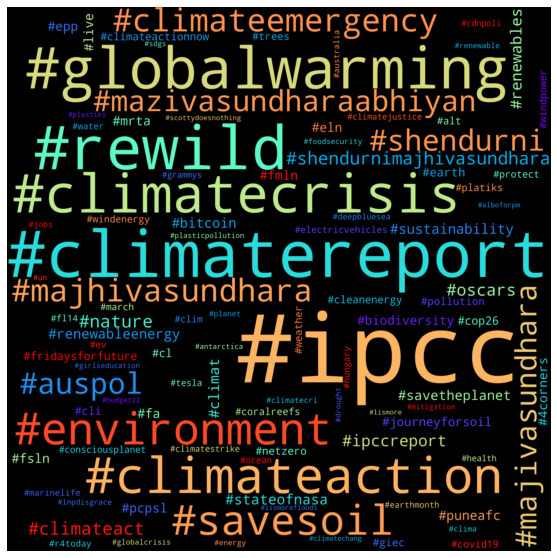

In [43]:
# create a word cloud from word frequency

from wordcloud import WordCloud
from PIL import Image

# create the WordCloud object

wordcloud = WordCloud(width=3500,height=3500,normalize_plurals=True, background_color='black',colormap='rainbow')

# generate the word cloud from word frequencies
wordcloud.generate_from_frequencies(top100_hashtags)

#plot
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## In Class Practice

### Create a word cloud to show top 50 mentioned twitter accounts